In [2]:
import ipywidgets as ip

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0)
import numpy as np
import uncertainties as u
from uncertainties import unumpy
import math as math

-0.256052407056


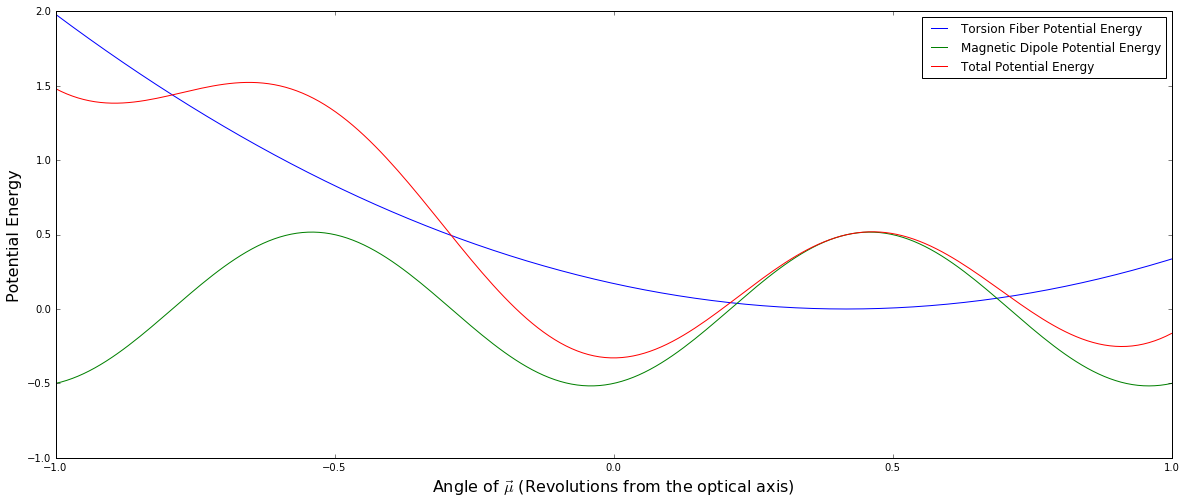

In [4]:
pi = np.pi

# Update
def calc_potential_energy(torsionZero, Bparr):
    steps = 200 # resolution. (number of points to calculate)
    # setup the angle array that we will use as our independant variable:
    alpha = np.linspace(-2*pi, 2*pi, steps)
    kappa = .05 # torsion constant should have units of (N m / rad) (kg m^2 s^-2 rad^-1)
    mu = .05 # magnetic moment
    # calculate the perpendicular field required to hold the dipole against the fiber
    Bperp = (-kappa* torsionZero)/(mu)
    # calculate the total magnetic field
    Bmag = (Bperp**2 + Bparr**2)**(1/2)
    Bdir = np.arctan2(Bperp, Bparr) # take the angle from the two components of the field
    
    # calculate the potential energies:
    torsionFiberPotentialEnergy = (1/2)*kappa*( torsionZero - alpha )**2
    
    # dipole potential
    magneticDipolePotentialEnergy = -1 * mu * Bmag * np.cos( Bdir - alpha )
        
    # total potental energy
    totalPotentialEnergy = torsionFiberPotentialEnergy + magneticDipolePotentialEnergy
    
    plot_potential_energies(alpha, torsionFiberPotentialEnergy, magneticDipolePotentialEnergy, totalPotentialEnergy)
    return# (alpha, torsionFiberPotentialEnergy, magneticDipolePotentialEnergy, totalPotentialEnergy)

# view
def plot_potential_energies(x, y1, y2, y3):
    
    plt.plot(x/(2*pi), y1, label='Torsion Fiber Potential Energy') # plot all the energies
    plt.plot(x/(2*pi), y2, label='Magnetic Dipole Potential Energy')
    plt.plot(x/(2*pi), y3, label='Total Potential Energy')
    
    plt.xlabel('Angle of $\\vec{\mu}$ (Revolutions from the optical axis)', size=16)
    plt.ylabel('Potential Energy', size=16)
    plt.legend()
    
    plt.show()
    #print(Bperp)
    
    
# now interface stuff

# model
ip.interact(calc_potential_energy, torsionZero=(-4*pi, 4*pi, pi/12), Bparr=(-10,10,0.05))

In [3]:
# plot the range in current as a rectangle
